# Image Segmentation with CellPose-SAM
Since Version 4 CellPose uses a variaton of the [Segment-Anything-Model](https://segment-anything.com/). 

See also
* [Cellpose-SAM preprint](https://www.biorxiv.org/content/10.1101/2025.04.28.651001v1)
* [Cellpose on github](https://github.com/MouseLand/cellpose)
* [Cellpose-SAM example notebook](https://github.com/MouseLand/cellpose/blob/main/notebooks/run_Cellpose-SAM.ipynb)

As usual, we start with loading an example image.

In [1]:
import cellpose



Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.3 
platform:       	win32 
python version: 	3.11.11 
torch version:  	2.6.0! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




In [2]:
from cellpose import models
import stackview
import numpy as np
from skimage.data import human_mitosis
from skimage.io import imread

[[ 8  8  8 ... 63 78 75]
 [ 8  8  7 ... 67 71 71]
 [ 9  8  8 ... 53 64 66]
 ...
 [ 8  9  8 ... 17 24 59]
 [ 8  8  8 ... 17 22 55]
 [ 8  8  8 ... 16 18 38]]
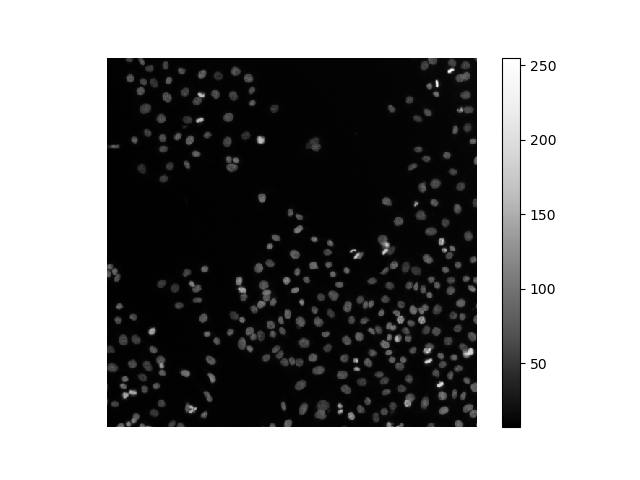
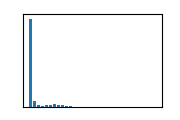

In [3]:
image = human_mitosis()
stackview.insight(image)

## Loading a pretrained model
CellPose-SAM comes with only a single model that generalizes for multiple images and channel variations.

In [4]:
model = models.CellposeModel(gpu=True)

We let the model "evaluate" the image to produce masks of segmented nuclei.

In [5]:
masks, flows, styles = model.eval(image, 
                                  batch_size=32, 
                                  flow_threshold=0.4, 
                                  cellprob_threshold=0.0,
                                  normalize={"tile_norm_blocksize": 0})

We convert the label image to integer type because many downstream libraries expect this.

In [6]:
masks = masks.astype(np.uint32)

[[0 0 0 ... 3 3 3]
 [0 0 0 ... 3 3 3]
 [0 0 0 ... 3 3 3]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
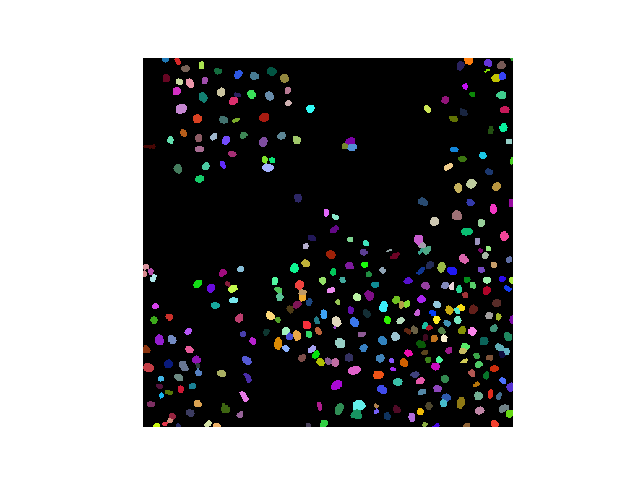

In [7]:
stackview.insight(masks)

## Exercise
Load `../../data/blobs.tif` and apply Cellpose-SAM to it.

Load `../../data/membrane2d.tif` and apply Cellpose-SAM to it.